# P1 - permutation-invariant functions

## P1.1

In [3]:
# importing necessary libraries
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load the dataset

In [5]:
train1 = read_csv('/content/drive/MyDrive/ST456-data/train-1.csv',header=None)
test1 = read_csv('/content/drive/MyDrive/ST456-data/test-1.csv',header=None)

### Data split and normalization

In [6]:
seed_value=0
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

In [7]:
# splitting into input features (X) and class labels/targets (y)
train1_feature, train1_target = train1.values[:, :-1], train1.values[:, -1]

feature1_normaliser = layers.Normalization(input_shape=[10,], axis=None, name='normaliser')
feature1_normaliser.adapt(train1_feature)

test1_feature1, test1_target = test1.values[:, :-1], test1.values[:, -1]

### Model definition

In [8]:
def Model(lat_dim,learning_rate):
    Model1 = keras.Sequential(name='First_model')
    Model1.add(feature1_normaliser)
    # phi layer
    Model1.add(layers.Dense(100,activation='relu',name='phi'))
    # The output layer with lat_dim output units
    Model1.add(layers.Dense(lat_dim))
    # rho layer
    Model1.add(layers.Dense(100,activation='relu',name='rho'))
    Model1.add(layers.Dense(1))

    Model1.compile(
        optimizer=tf.optimizers.SGD(learning_rate),
        loss='mean_squared_error')
    return Model1

In [113]:
Model(lat_dim=5, learning_rate=0.0001).summary()

Model: "First_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normaliser (Normalization)  (None, 10)                3         
                                                                 
 phi (Dense)                 (None, 100)               1100      
                                                                 
 dense_37 (Dense)            (None, 5)                 505       
                                                                 
 rho (Dense)                 (None, 100)               600       
                                                                 
 dense_38 (Dense)            (None, 1)                 101       
                                                                 
Total params: 2,309
Trainable params: 2,306
Non-trainable params: 3
_________________________________________________________________


## P1.2

### lat_dim = 5

In [114]:
Model1 = Model(5, 0.0001)
history1 = Model1.fit(train1_feature, train1_target, epochs=10, batch_size=128, 
    verbose=2, validation_split = 0.1, validation_data = None)

Epoch 1/10
704/704 - 3s - loss: 0.1496 - val_loss: 0.1152 - 3s/epoch - 4ms/step
Epoch 2/10
704/704 - 2s - loss: 0.0937 - val_loss: 0.0758 - 2s/epoch - 3ms/step
Epoch 3/10
704/704 - 2s - loss: 0.0648 - val_loss: 0.0556 - 2s/epoch - 3ms/step
Epoch 4/10
704/704 - 2s - loss: 0.0499 - val_loss: 0.0452 - 2s/epoch - 3ms/step
Epoch 5/10
704/704 - 2s - loss: 0.0421 - val_loss: 0.0397 - 2s/epoch - 3ms/step
Epoch 6/10
704/704 - 2s - loss: 0.0379 - val_loss: 0.0365 - 2s/epoch - 3ms/step
Epoch 7/10
704/704 - 2s - loss: 0.0354 - val_loss: 0.0345 - 2s/epoch - 3ms/step
Epoch 8/10
704/704 - 2s - loss: 0.0337 - val_loss: 0.0331 - 2s/epoch - 3ms/step
Epoch 9/10
704/704 - 2s - loss: 0.0324 - val_loss: 0.0319 - 2s/epoch - 3ms/step
Epoch 10/10
704/704 - 2s - loss: 0.0313 - val_loss: 0.0309 - 2s/epoch - 3ms/step


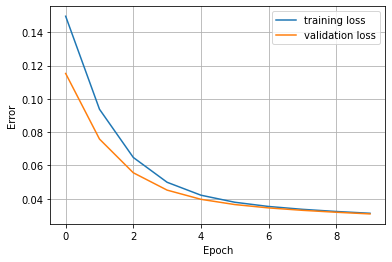

In [115]:
plt.plot(history1.history['loss'], label='training loss')
plt.plot(history1.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

In [116]:
Model1.evaluate(test1_feature1,test1_target,verbose=2)

313/313 - 1s - loss: 0.0312 - 633ms/epoch - 2ms/step


0.031236547976732254

### lat_dim = 100

In [117]:
Model2 = Model(100,0.0001)
history2 = Model2.fit(train1_feature, train1_target, epochs=10, batch_size=128, 
    verbose=2, validation_split = 0.1, validation_data = None)

Epoch 1/10
704/704 - 3s - loss: 0.2547 - val_loss: 0.0957 - 3s/epoch - 4ms/step
Epoch 2/10
704/704 - 2s - loss: 0.0580 - val_loss: 0.0370 - 2s/epoch - 3ms/step
Epoch 3/10
704/704 - 2s - loss: 0.0322 - val_loss: 0.0283 - 2s/epoch - 3ms/step
Epoch 4/10
704/704 - 2s - loss: 0.0273 - val_loss: 0.0256 - 2s/epoch - 3ms/step
Epoch 5/10
704/704 - 2s - loss: 0.0251 - val_loss: 0.0239 - 2s/epoch - 3ms/step
Epoch 6/10
704/704 - 2s - loss: 0.0236 - val_loss: 0.0225 - 2s/epoch - 3ms/step
Epoch 7/10
704/704 - 2s - loss: 0.0223 - val_loss: 0.0214 - 2s/epoch - 3ms/step
Epoch 8/10
704/704 - 2s - loss: 0.0213 - val_loss: 0.0205 - 2s/epoch - 3ms/step
Epoch 9/10
704/704 - 2s - loss: 0.0204 - val_loss: 0.0197 - 2s/epoch - 3ms/step
Epoch 10/10
704/704 - 2s - loss: 0.0197 - val_loss: 0.0190 - 2s/epoch - 3ms/step


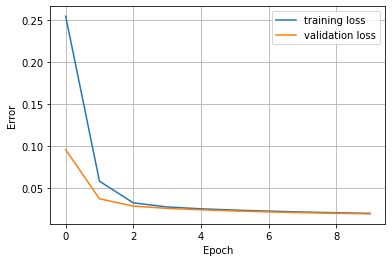

In [118]:
plt.plot(history2.history['loss'], label='training loss')
plt.plot(history2.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

In [119]:
Model2.evaluate(test1_feature1,test1_target,verbose=0)

0.019299013540148735

The test MSE is 0.0193 when lat_dim is 100, which is lower than 0.0312 when lat_dim is 5. It indicate that increase the latent space might be a good choice. 

## P1.3

 ### learning rates = 0.01

In [120]:
Model3 = Model(100,0.01)
history3 = Model3.fit(train1_feature, train1_target, epochs=10, batch_size=128, 
    verbose=0, validation_split = 0.1, validation_data = None)

In [121]:
Model3.evaluate(test1_feature1,test1_target,verbose=0)

0.003937091678380966

### learning rates = 0.1

In [122]:
Model4 = Model(100,0.1)
history4 = Model4.fit(train1_feature, train1_target, epochs=10, batch_size=128, 
    verbose=0, validation_split = 0.1, validation_data = None)

In [123]:
Model4.evaluate(test1_feature1,test1_target,verbose=0)

0.002628923859447241

 ### learning rates = 0.5

In [124]:
Model5 = Model(100,0.5)
history5 = Model5.fit(train1_feature, train1_target, epochs=10, batch_size=128, 
    verbose=0, validation_split = 0.1, validation_data = None)

In [125]:
Model5.evaluate(test1_feature1,test1_target,verbose=0)

nan

The test MSE error gets smaller when we keep lat_dim = 100 and change the learning rate to 0.01 and 0.1. Howerer, the loss value is nan when learning rate is 0.5.

## P1.4

### Model with ReLU activation functions (50 epochs)

In [126]:
Model6 = Model(100,0.0001)
history6 = Model6.fit(train1_feature, train1_target, epochs=50, batch_size=128, 
    verbose=2, validation_split = 0.1, validation_data = None)

Epoch 1/50
704/704 - 2s - loss: 0.1391 - val_loss: 0.0750 - 2s/epoch - 3ms/step
Epoch 2/50
704/704 - 2s - loss: 0.0590 - val_loss: 0.0488 - 2s/epoch - 3ms/step
Epoch 3/50
704/704 - 2s - loss: 0.0447 - val_loss: 0.0406 - 2s/epoch - 3ms/step
Epoch 4/50
704/704 - 2s - loss: 0.0381 - val_loss: 0.0353 - 2s/epoch - 3ms/step
Epoch 5/50
704/704 - 2s - loss: 0.0335 - val_loss: 0.0312 - 2s/epoch - 3ms/step
Epoch 6/50
704/704 - 2s - loss: 0.0298 - val_loss: 0.0280 - 2s/epoch - 3ms/step
Epoch 7/50
704/704 - 2s - loss: 0.0269 - val_loss: 0.0254 - 2s/epoch - 3ms/step
Epoch 8/50
704/704 - 2s - loss: 0.0246 - val_loss: 0.0233 - 2s/epoch - 3ms/step
Epoch 9/50
704/704 - 2s - loss: 0.0227 - val_loss: 0.0217 - 2s/epoch - 3ms/step
Epoch 10/50
704/704 - 2s - loss: 0.0211 - val_loss: 0.0203 - 2s/epoch - 3ms/step
Epoch 11/50
704/704 - 2s - loss: 0.0198 - val_loss: 0.0191 - 2s/epoch - 3ms/step
Epoch 12/50
704/704 - 2s - loss: 0.0188 - val_loss: 0.0182 - 2s/epoch - 3ms/step
Epoch 13/50
704/704 - 2s - loss: 0.01

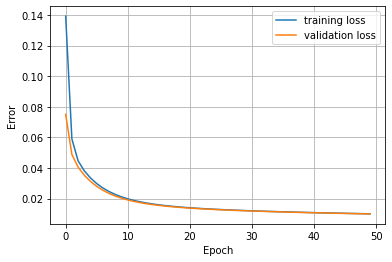

In [127]:
plt.plot(history6.history['loss'], label='training loss')
plt.plot(history6.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

In [128]:
Model6.evaluate(test1_feature1,test1_target,verbose=0)

0.010199460200965405

Compared to lat_dim = 100 and 10 epochs in Part 1.2, the test MSE continues to decrease as we run more epochs.

### Model with sigmoid activation functions

In [129]:
Model7 = keras.Sequential(name='First_model')
Model7.add(feature1_normaliser)
# phi
Model7.add(layers.Dense(100,activation='sigmoid',name='phi'))
# The output layer with lat_dim output units
Model7.add(layers.Dense(100))
# rho
Model7.add(layers.Dense(100,activation='sigmoid',name='rho'))
Model7.add(layers.Dense(1))

Model7.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.0001),
    loss='mean_squared_error')

In [130]:
history7 = Model7.fit(train1_feature, train1_target, epochs=50, batch_size=128, 
    verbose=2, validation_split = 0.1, validation_data = None)

Epoch 1/50
704/704 - 3s - loss: 0.0345 - val_loss: 0.0220 - 3s/epoch - 4ms/step
Epoch 2/50
704/704 - 2s - loss: 0.0218 - val_loss: 0.0218 - 2s/epoch - 3ms/step
Epoch 3/50
704/704 - 2s - loss: 0.0217 - val_loss: 0.0216 - 2s/epoch - 3ms/step
Epoch 4/50
704/704 - 2s - loss: 0.0215 - val_loss: 0.0215 - 2s/epoch - 3ms/step
Epoch 5/50
704/704 - 3s - loss: 0.0213 - val_loss: 0.0213 - 3s/epoch - 4ms/step
Epoch 6/50
704/704 - 3s - loss: 0.0212 - val_loss: 0.0211 - 3s/epoch - 4ms/step
Epoch 7/50
704/704 - 2s - loss: 0.0210 - val_loss: 0.0210 - 2s/epoch - 3ms/step
Epoch 8/50
704/704 - 2s - loss: 0.0208 - val_loss: 0.0208 - 2s/epoch - 3ms/step
Epoch 9/50
704/704 - 2s - loss: 0.0207 - val_loss: 0.0206 - 2s/epoch - 3ms/step
Epoch 10/50
704/704 - 2s - loss: 0.0205 - val_loss: 0.0205 - 2s/epoch - 3ms/step
Epoch 11/50
704/704 - 2s - loss: 0.0204 - val_loss: 0.0203 - 2s/epoch - 3ms/step
Epoch 12/50
704/704 - 2s - loss: 0.0202 - val_loss: 0.0202 - 2s/epoch - 3ms/step
Epoch 13/50
704/704 - 2s - loss: 0.02

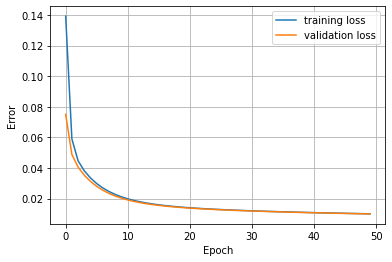

In [131]:
plt.plot(history6.history['loss'], label='training loss')
plt.plot(history6.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

In [132]:
Model7.evaluate(test1_feature1,test1_target,verbose=0)

0.015466658398509026

### Comparing models

In [133]:
print(Model6.evaluate(test1_feature1,test1_target,verbose=0))
print(Model7.evaluate(test1_feature1,test1_target,verbose=0))

0.010199460200965405
0.015466658398509026


The test MSE is 0.0102 when using the ReLU activation function and 0.0155 when using the sigmoid activation function.

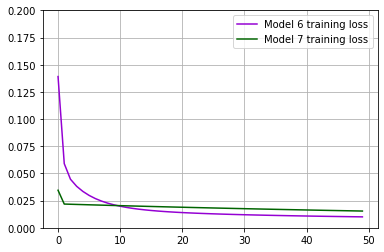

In [29]:
plt.plot(history6.history['loss'], label='Model 6 training loss',color='darkviolet')
plt.plot(history7.history['loss'], label='Model 7 training loss',color='darkgreen')
plt.ylim([0, 0.2])
plt.legend()
plt.grid(True)
plt.show()

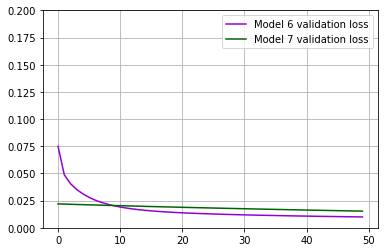

In [30]:
plt.plot(history6.history['val_loss'], label='Model 6 validation loss',color='darkviolet')
plt.plot(history7.history['val_loss'], label='Model 7 validation loss',color='darkgreen')
plt.ylim([0, 0.2])
plt.legend()
plt.grid(True)
plt.show()

The loss and validation loss plots for differnet activation functions show that the loss with ReLU function decreases when running more epochs. The sigmoid functions seems more steable. So using ReLU functions would be a good chocie.

## P1.5

### Model definition

In [9]:
seed_value = 0
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

In [10]:
from keras.callbacks import ModelCheckpoint

In [11]:
# Construct a matrix to store the test MSE for the best models
test_MSE = np.zeros([5,19])
for run in [1,2,3,4,5]:
    print(run)
    MSE = []
    for value in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]:
             model= Model(value, 0.0001)
             # Select the best model using callbacks
             checkpointer = ModelCheckpoint(filepath='model.best.hdf5', verbose=1, save_best_only=True)
             # Train the model
             history = model.fit(train1_feature, train1_target, epochs=5, batch_size=128, 
                 verbose=0, validation_split = 0.1, callbacks=[checkpointer], shuffle=True)
             # Load the weights that yielded the best validation accuracy
             model.load_weights('model.best.hdf5')
             # Evaluate test MSE
             MSE.append(model.evaluate(test1_feature1,test1_target,verbose=0))
    # Substitute MSE for each runs to the test_MSE matrix
    test_MSE[run-1,:] = MSE

1

Epoch 1: val_loss improved from inf to 0.19071, saving model to model.best.hdf5

Epoch 2: val_loss improved from 0.19071 to 0.12510, saving model to model.best.hdf5

Epoch 3: val_loss improved from 0.12510 to 0.08426, saving model to model.best.hdf5

Epoch 4: val_loss improved from 0.08426 to 0.05882, saving model to model.best.hdf5

Epoch 5: val_loss improved from 0.05882 to 0.04305, saving model to model.best.hdf5

Epoch 1: val_loss improved from inf to 0.09737, saving model to model.best.hdf5

Epoch 2: val_loss improved from 0.09737 to 0.05465, saving model to model.best.hdf5

Epoch 3: val_loss improved from 0.05465 to 0.03396, saving model to model.best.hdf5

Epoch 4: val_loss improved from 0.03396 to 0.02459, saving model to model.best.hdf5

Epoch 5: val_loss improved from 0.02459 to 0.02041, saving model to model.best.hdf5

Epoch 1: val_loss improved from inf to 0.15398, saving model to model.best.hdf5

Epoch 2: val_loss improved from 0.15398 to 0.09762, saving model to model.

For each training run, a Callback method is used to find the best model for different latent dimension settings.

Construct the test_MSE matrix to store the test MSE values for the best model for each training run. Rows represent training runs, while the columns represent lat_dim.

 ### Compute the mean of the test MSE values 

In [14]:
test_MSE

array([[0.04374652, 0.02088043, 0.04013807, 0.02115081, 0.04997356,
        0.01811013, 0.05143402, 0.02038458, 0.02570245, 0.02853714,
        0.03832728, 0.03193356, 0.04546349, 0.03433238, 0.02874942,
        0.02158041, 0.02593551, 0.02863973, 0.04742252],
       [0.0309463 , 0.03690132, 0.03431238, 0.02753209, 0.04692673,
        0.04264513, 0.03475321, 0.03052152, 0.03085301, 0.04473656,
        0.03859999, 0.03883408, 0.02426688, 0.03213682, 0.0384122 ,
        0.03198325, 0.02615456, 0.03711769, 0.03321813],
       [0.03872586, 0.04271258, 0.04085999, 0.02691856, 0.024396  ,
        0.03508511, 0.03562142, 0.02475818, 0.02161309, 0.02563676,
        0.03282446, 0.04241382, 0.03027409, 0.03089417, 0.03944937,
        0.03980155, 0.04065123, 0.02768098, 0.03276088],
       [0.0413149 , 0.03974033, 0.03523439, 0.03064032, 0.03821893,
        0.04339607, 0.02975044, 0.02633659, 0.03441869, 0.03559109,
        0.03119136, 0.03369077, 0.03605317, 0.03438177, 0.02678714,
        0.033

In [15]:
mean_test_MSE = test_MSE.mean(0)
lat_dim1 = [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]

In [17]:
mean_test_MSE

array([0.03702992, 0.03501693, 0.03903841, 0.02839344, 0.04013336,
       0.03406455, 0.03793703, 0.02611299, 0.02705896, 0.03385292,
       0.03509307, 0.03505713, 0.0316709 , 0.03227923, 0.03306548,
       0.03114704, 0.03391738, 0.03043638, 0.03580589])

In [20]:
min(mean_test_MSE)

0.0261129941791296

### Plot fot the mean test MSE versus lat_dim

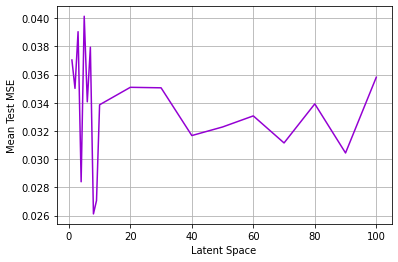

In [16]:
plt.plot(lat_dim1, mean_test_MSE,color='darkviolet')
plt.grid(True)
plt.xlabel('Latent Space')
plt.ylabel('Mean Test MSE')
plt.show()

The plot shows that the mean test MSE is lowest when the latent space is 8. The curve fluctuates a lot when choosing a small latent space. Models with more latent space would be stable.

It suggest that the model would perform better in shorter epochs(5) when lat_dim = 8. Howerer, this may not be the case when running more epochs. 

# P2 - permutation-equivariant functions

## P2.1

### Load the dataset

The first row and column of the original data should be dropped.

In [91]:
xtrain_2 = read_csv('/content/drive/MyDrive/ST456-data/xtrain-2.csv')
ytrain_2 = read_csv('/content/drive/MyDrive/ST456-data/ytrain-2.csv')
xtest_2 = read_csv('/content/drive/MyDrive/ST456-data/xtest-2.csv')
ytest_2 = read_csv('/content/drive/MyDrive/ST456-data/ytest-2.csv')

In [92]:
# Drop the first column of data
xtrain_2, ytrain_2 = xtrain_2.values[:, 1:], ytrain_2.values[:, 1:]
xtest_2, ytest_2 = xtest_2.values[:, 1:], ytest_2.values[:, 1:]

Reshape the data to (5, 1, 3) to split the input into 3 channels.

In [93]:
# Reshape the data to (200000, 5, 1, 3)
xtrain_2 = tf.reshape(xtrain_2, [200000, 5, 1, 3])
print("xtrain_2 original shape: ", xtrain_2.shape)
xtest_2 = tf.reshape(xtest_2, [200000, 5, 1, 3])
print("xtest_2 original shape: ", xtest_2.shape)

xtrain_2 original shape:  (200000, 5, 1, 3)
xtest_2 original shape:  (200000, 5, 1, 3)


## P2.2

### Implement and Train the NN with (L, w) = (2, 5)

In [94]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D

In [95]:
m = 5
w = 5
model2 = Sequential()
# 1 x 1 convolution kernel with 3 input channels and w output channels
model2.add(Conv2D(w, (1, 1), input_shape=(5, 1, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
# 1 x 1 convolution kernel 1 output channels
model2.add(Conv2D(1, (1, 1), padding='same', kernel_initializer='he_uniform'))
model2.add(Dense(m))

model2.compile(optimizer=tf.optimizers.Adam(learning_rate = 0.0001 , epsilon = 0.001), 
               loss='mean_squared_error')

In [96]:
history_1 = model2.fit(xtrain_2, ytrain_2, validation_split = 0.1, 
                       epochs=50, batch_size=300, verbose=2)

Epoch 1/50
600/600 - 4s - loss: 0.3136 - val_loss: 0.2697 - 4s/epoch - 6ms/step
Epoch 2/50
600/600 - 3s - loss: 0.2414 - val_loss: 0.2186 - 3s/epoch - 5ms/step
Epoch 3/50
600/600 - 3s - loss: 0.2035 - val_loss: 0.1914 - 3s/epoch - 5ms/step
Epoch 4/50
600/600 - 3s - loss: 0.1835 - val_loss: 0.1773 - 3s/epoch - 5ms/step
Epoch 5/50
600/600 - 3s - loss: 0.1733 - val_loss: 0.1702 - 3s/epoch - 5ms/step
Epoch 6/50
600/600 - 3s - loss: 0.1683 - val_loss: 0.1667 - 3s/epoch - 5ms/step
Epoch 7/50
600/600 - 3s - loss: 0.1656 - val_loss: 0.1647 - 3s/epoch - 5ms/step
Epoch 8/50
600/600 - 3s - loss: 0.1640 - val_loss: 0.1633 - 3s/epoch - 5ms/step
Epoch 9/50
600/600 - 4s - loss: 0.1628 - val_loss: 0.1623 - 4s/epoch - 6ms/step
Epoch 10/50
600/600 - 5s - loss: 0.1619 - val_loss: 0.1616 - 5s/epoch - 9ms/step
Epoch 11/50
600/600 - 5s - loss: 0.1613 - val_loss: 0.1611 - 5s/epoch - 8ms/step
Epoch 12/50
600/600 - 5s - loss: 0.1609 - val_loss: 0.1607 - 5s/epoch - 8ms/step
Epoch 13/50
600/600 - 4s - loss: 0.16

Plot for the validation loss versus the number of epochs

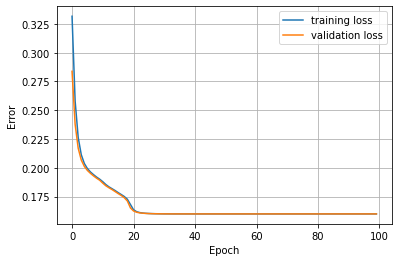

In [13]:
plt.plot(history_1.history['loss'], label='training loss')
plt.plot(history_1.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

Compute the test MSE value and add it into the test_MSE2 array:

In [103]:
test_MSE2 = []
test_MSE2.append(model2.evaluate(xtest_2,ytest_2,verbose=0))
print(model2.evaluate(xtest_2,ytest_2,verbose=0))

0.16350644826889038


The performace of this neural network architecture is not good, since the loss stagnanted at 0.16 after 22 epochs.

### (L, w) = (2, 10), (2, 100) or (2, 200)

Repeating the process for differnet L and w:

In [104]:
# L = 2
for w in [10, 100, 200]:
    print(w)
    model2 = Sequential()
    model2.add(Conv2D(w, (1, 1), input_shape=(5, 1, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
    model2.add(Conv2D(1, (1, 1), padding='same', kernel_initializer='he_uniform'))
    model2.add(Dense(m, activation='relu'))

    model2.compile(optimizer=tf.optimizers.Adam(learning_rate = 0.0001 , epsilon = 0.001), 
               loss='mean_squared_error')
    
    history_2 = model2.fit(xtrain_2, ytrain_2, validation_split = 0.1, 
                       epochs=100, batch_size=300, verbose=0)
    test_MSE2.append(model2.evaluate(xtest_2,ytest_2,verbose=0))

10
100
200


### (L, w) = (3, 5), (3, 10), (3, 100) or (3, 200) 

In [105]:
# L = 3
for w in [5, 10, 100]:
    print(w)
    model2 = Sequential()
    model2.add(Conv2D(w, (1, 1), input_shape=(5, 1, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
    # Extra equivariant layers
    model2.add(Conv2D(w, (1, 1), input_shape=(5, 1, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
    model2.add(Conv2D(1, (1, 1), padding='same', kernel_initializer='he_uniform'))
    model2.add(Dense(m, activation='relu'))

    model2.compile(optimizer=tf.optimizers.Adam(learning_rate = 0.0001 , epsilon = 0.001), 
               loss='mean_squared_error')
    
    history_2 = model2.fit(xtrain_2, ytrain_2, validation_split = 0.1, 
                       epochs=100, batch_size=300, verbose=0)
    test_MSE2.append(model2.evaluate(xtest_2,ytest_2,verbose=0))

5
10
100


### Results

In [106]:
test_MSE2

[0.16350644826889038,
 0.16000008583068848,
 0.16002458333969116,
 0.16806244850158691,
 0.16000373661518097,
 0.16001498699188232,
 0.16001860797405243]

The test MSE values for different settings are all around 0.16. It indicate that this neural network architecture should be improved.